In [128]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


In [129]:
#load  random dataset
a = np.random.multivariate_normal((1.5, 3), [[0.5, 0], [0, .05]], 30)
b = np.random.multivariate_normal((4, 1.5), [[0.5, 0], [0, .05]], 30)

In [130]:
mu_a,mu_b=a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
var_a,var_b=np.cov(a.T),np.cov(b.T)
SW=var_a+var_b
SB=(mu_a-mu_b)@((mu_a-mu_b).T)
print(SW.shape)
print(SB.shape)

(2, 2)
(2, 2)


In [131]:
SW_inv=np.linalg.inv(SW)
A=SW_inv@SB
eigen_value,eigen_vector=np.linalg.eig(A)
print(eigen_vector)
print(eigen_value)


[[-0.5350997   0.16113141]
 [-0.84478892 -0.98693296]]
[ 0.         41.75004303]


In [132]:
index = np.argmax(eigen_value)
best_eigenvector = eigen_vector[:, index]
projected_a=a@best_eigenvector
projected_b=b@best_eigenvector


In [133]:
bias = -1*best_eigenvector.T @ (mu_a - mu_b) / 2

/tmp/ipykernel_18803/4020573751.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='blue', alpha=.7)
/tmp/ipykernel_18803/4020573751.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='blue', alpha=.7)
/tmp/ipykernel_18803/4020573751.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='red', alpha=.7)
/tmp/ipykernel_18803/40

Angle with the x-axis: 279.2725736544768


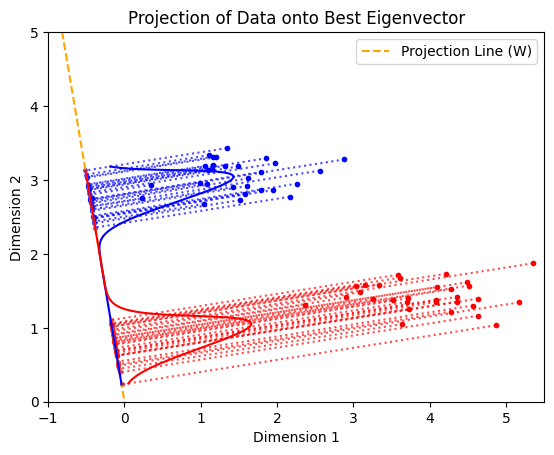

In [167]:
plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r.')
plt.gca().set_xlim(-1,5.5)
plt.gca().set_ylim(0,5)
x_vals = np.array(plt.gca().get_xlim())
y_vals = (x_vals * best_eigenvector[1] / best_eigenvector[0])
plt.plot(x_vals, y_vals, '--', color='orange', label='Projection Line (W)')

for point, projection in zip(a, projected_a):
    projection_point = projection * best_eigenvector
    plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='blue', alpha=.7)
    plt.scatter([point[0], projection_point[0]], [point[1], projection_point[1]], color='b', alpha=.5, s=8)

for point, projection in zip(b, projected_b):
    projection_point = projection * best_eigenvector
    plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='red', alpha=.7)
    plt.scatter([point[0], projection_point[0]], [point[1], projection_point[1]], color='r', alpha=.5, s=8)


mu_proj_a, sigma_proj_a = norm.fit(projected_a)
mu_proj_b, sigma_proj_b = norm.fit(projected_b)

# Plot Gaussian distributions on the projection line
x_gauss = np.linspace(min(projected_a.min(), projected_b.min()), max(projected_a.max(), projected_b.max()), 1000)
y_gauss_a = norm.pdf(x_gauss, mu_proj_a, sigma_proj_a)
y_gauss_b = norm.pdf(x_gauss, mu_proj_b, sigma_proj_b)


import math
def calculate_angle(x1, y1, x2, y2):
    # Calculate the angle using arctan2
    angle_radians = math.atan2(y2 - y1, x2 - x1)
    # Convert radians to degrees
    angle_degrees = math.degrees(angle_radians)
    # Ensure the angle is between 0 and 360 degrees
    angle_degrees = (angle_degrees + 360) % 360
    return angle_degrees

# Example points
x1 = x_vals[0]
y1 = y_vals[0]
x2 = x_vals[1]
y2 = y_vals[1]

angle = calculate_angle(x1, y1, x2, y2)
print("Angle with the x-axis:", angle)

def rotate_point(x, y, angle):
    # Convert angle from degrees to radians
    angle_rad = math.radians(angle)
    # Apply rotation formulas
    x_rotated = x * math.cos(angle_rad) - y * math.sin(angle_rad)
    y_rotated = x * math.sin(angle_rad) + y * math.cos(angle_rad)
    return x_rotated, y_rotated

rotated_x_gauss_a = []
rotated_y_gauss_a = []
rotated_x_gauss_b = []
rotated_y_gauss_b = []

for x, y in zip(x_gauss, y_gauss_a):
    rotated_x, rotated_y = rotate_point(x, y, angle)
    rotated_x_gauss_a.append(rotated_x)
    rotated_y_gauss_a.append(rotated_y)

for x, y in zip(x_gauss, y_gauss_b):
    rotated_x, rotated_y = rotate_point(x, y, angle)
    rotated_x_gauss_b.append(rotated_x)
    rotated_y_gauss_b.append(rotated_y)

plt.plot(rotated_x_gauss_a, rotated_y_gauss_a, c='blue')
plt.plot(rotated_x_gauss_b, rotated_y_gauss_b, c='red')


# plt.axvline(x=0, color='green', linestyle='--')
# plt.axhline(y=0, color='green', linestyle='--')
plt.title('Projection of Data onto Best Eigenvector')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()